# Visualize the pre-processed images at destination

Notebook to visualise the pre-processed images, created through data_preparation/preprocess_coco.py script.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Specify the paths to the COCO dataset files
data_dir = "/home/maver02/Development/Datasets/COCO/"
# Create directories for preprocessed images and masks
preprocessed_dir = os.path.join(data_dir, 'preprocessed')

# Path to the preprocessed validation images and masks
val_images_dir = os.path.join(preprocessed_dir, 'val', 'images')
val_masks_dir = os.path.join(preprocessed_dir, 'val', 'masks')

In [3]:
def visualize_image_and_mask(image_file, images_dir, masks_dir):
    """
    Displays an image and its corresponding mask side by side.

    Args:
        image_file (str): The name of the image file to visualize.
        images_dir (str): Directory containing preprocessed images.
        masks_dir (str): Directory containing preprocessed masks.

    Returns:
        None
    """
    # Load the image and mask
    image_path = os.path.join(images_dir, image_file)
    mask_path = os.path.join(masks_dir, image_file.replace('.jpg', '.png'))

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        print(f"Failed to load image or mask for {image_file}")
        return

    # Convert the image to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image and mask side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.show()

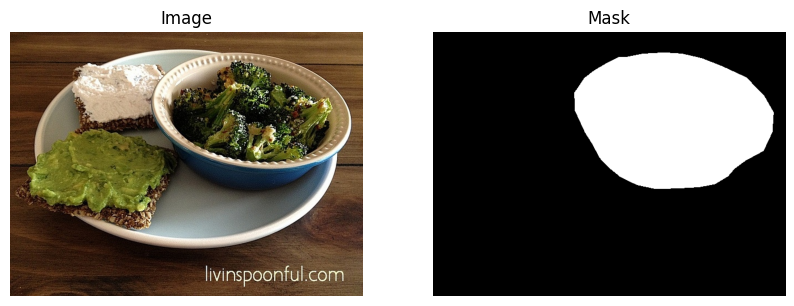

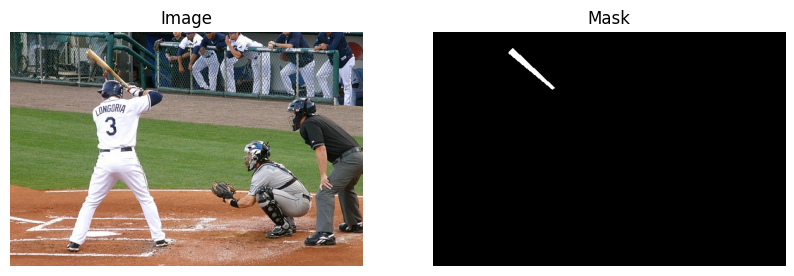

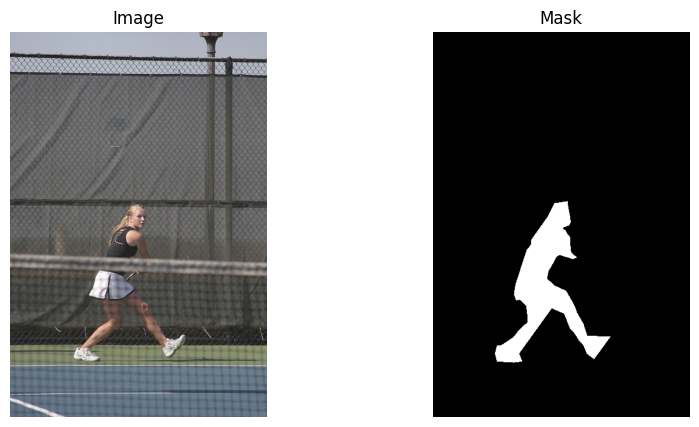

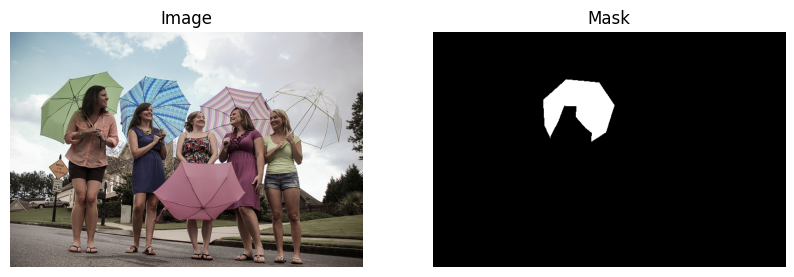

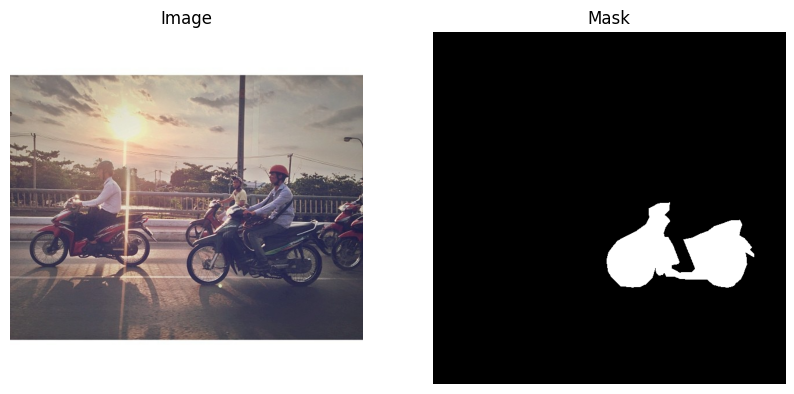

In [4]:
# Example: Visualize a few random images and masks from the validation set
val_image_files = os.listdir(val_images_dir)
for image_file in val_image_files[:5]:  # Visualize the first 5 images and masks
    visualize_image_and_mask(image_file, val_images_dir, val_masks_dir)